1. Pra-pemrosesan Data:

Diberikan dataset student_scores.csv yang berisi kolom hours_studied dan exam_score. Lakukan langkah-langkah pra-pemrosesan data berikut:

a. Periksa missing values dan tangani jika ada.

b. Normalisasi kolom hours_studied.

In [10]:
#import library
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [11]:
data = pd.read_csv('./Dataset/student_scores.csv')
df = pd.DataFrame(data)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [13]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
# Hal ini menunjukkan adanya missing value pada kolom tersebut
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [15]:
# Pisahkan fitur dan target
X = df.drop('Scores', axis=1)
y = df['Scores']

In [17]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Fit dan transform data fitur
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.17283951],
       [0.49382716],
       [0.25925926],
       [0.91358025],
       [0.2962963 ],
       [0.04938272],
       [1.        ],
       [0.54320988],
       [0.88888889],
       [0.19753086],
       [0.81481481],
       [0.59259259],
       [0.41975309],
       [0.27160494],
       [0.        ],
       [0.96296296],
       [0.17283951],
       [0.09876543],
       [0.61728395],
       [0.77777778],
       [0.19753086],
       [0.45679012],
       [0.33333333],
       [0.71604938],
       [0.82716049]])

2. Pemodelan dan Pelatihan:

Gunakan dataset student_scores.csv untuk membuat model regresi linier sederhana yang memprediksi exam_score berdasarkan hours_studied.

a. Pisahkan dataset menjadi training dan testing set dengan proporsi 80:20.

b. Latih model regresi linier pada training set.

c. Evaluasi model pada testing set menggunakan metrik mean squared error (MSE).

In [18]:
from sklearn.model_selection import train_test_split
# Pisahkan data menjadi set pelatihan dan pengujian (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Langkah 4: Melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Langkah 5: Membuat prediksi menggunakan model yang dilatih
y_pred = model.predict(X_test)

In [20]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Koefisien: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Koefisien:  [78.42483305]
Intercept:  13.477178323800999
Mean Squared Error:  18.943211722315247
R^2 Score:  0.9678055545167994


3. Pemilihan Algoritma:

Diberikan dataset iris.csv yang berisi fitur-fitur tanaman iris dan kolom target species. Bandingkan performa dua algoritma berikut dalam mengklasifikasikan species:

a. Decision Tree

b. K-Nearest Neighbors (k-NN)

Pisahkan dataset menjadi training dan testing set, latih kedua model, dan bandingkan akurasi serta F1-score dari masing-masing model.

In [28]:
# Decicon Tree
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt

In [23]:
# Memuat dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

In [24]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 70 % data training 30% data testing

In [25]:
model= DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
# Predict on the test data
y_pred = model.predict(X_test)

In [27]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



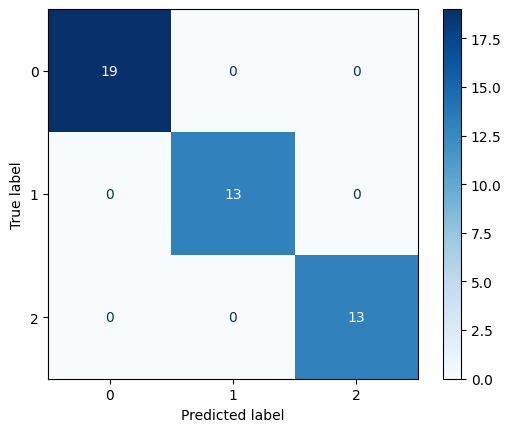

In [29]:
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [35]:
from sklearn.neighbors import KNeighborsClassifier
# K-Nearest Neighbors (k-NN)
k = 3  # jumlah tetangga terdekat
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
y_pred = knn.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi: ", accuracy)
print("Classification Report: \n", class_report)
print("Confusion Matrix: \n", conf_matrix)

Akurasi:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


4. Hyperparameter Tuning:

Gunakan dataset iris.csv untuk model K-Nearest Neighbors (k-NN). Lakukan hyperparameter tuning untuk menentukan nilai k terbaik menggunakan teknik grid search.

a. Tentukan rentang nilai k yang akan diuji (misalnya, k dari 1 hingga 10).

b. Gunakan cross-validation untuk setiap nilai k dan temukan nilai k dengan performa terbaik berdasarkan akurasi.

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

In [39]:
iris = load_iris()
X = iris.data
y = iris.target


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
param_grid = {'n_neighbors': np.arange(1, 11)}  # Rentang nilai k dari 1 hingga 10
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')  # Menggunakan 5-fold cross-validation
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='accuracy')

In [42]:
best_k = grid_search.best_params_['n_neighbors']
print("Nilai k terbaik: ", best_k)

Nilai k terbaik:  3


In [43]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi: ", accuracy)
print("Classification Report: \n", class_report)
print("Confusion Matrix: \n", conf_matrix)

Akurasi:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


5. Ensemble Learning:

Implementasikan model ensemble menggunakan dataset breast_cancer.csv. Bandingkan performa model berikut:

a. Random Forest

b. Gradient Boosting

Gunakan metrik evaluasi seperti akurasi, precision, recall, dan F1-score untuk membandingkan kedua model.

In [66]:
# Impor library yang diperlukan
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [67]:
datas = pd.read_csv('/Users/muhammadzuamaalamin/Documents/KecerdasanBuatan/UAS/Dataset/data.csv')
datas2 = pd.DataFrame(data)
datas2.head(10)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [55]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [68]:
# Hal ini menunjukkan adanya missing value pada kolom tersebut
datas.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [69]:
# Langkah 3: Menghapus kolom 'Unnamed: 32' jika ada
if 'Unnamed: 32' in datas.columns:
    datas = datas.drop(columns=['Unnamed: 32'])
datas.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [70]:
X = datas.drop(columns=['diagnosis'])  # Fitur
y = datas['diagnosis']  # Label

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [73]:
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [74]:
y_pred_rf = random_forest.predict(X_test)
y_pred_gb = gradient_boosting.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, pos_label='M'))
print("Recall:", recall_score(y_test, y_pred_rf, pos_label='M'))
print("F1-score:", f1_score(y_test, y_pred_rf, pos_label='M'))
print("\n")


Random Forest:
Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1-score: 0.9523809523809523




In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Gradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb, pos_label='M'))
print("Recall:", recall_score(y_test, y_pred_gb, pos_label='M'))
print("F1-score:", f1_score(y_test, y_pred_gb, pos_label='M'))


Gradient Boosting:
Accuracy: 0.9473684210526315
Precision: 0.9302325581395349
Recall: 0.9302325581395349
F1-score: 0.9302325581395349


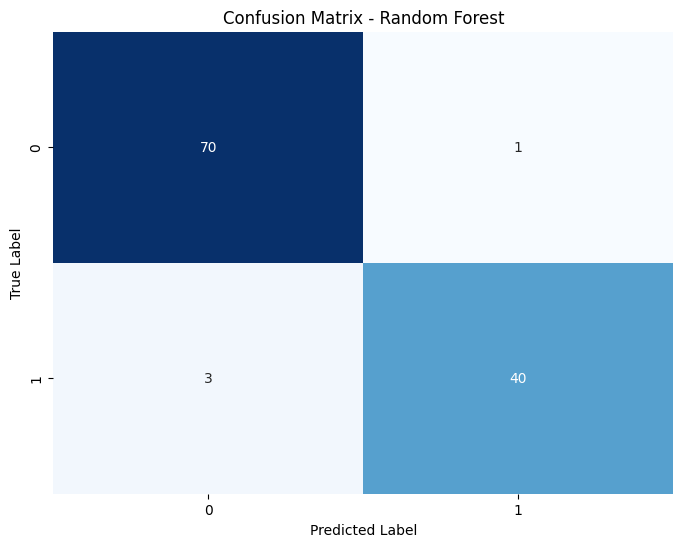

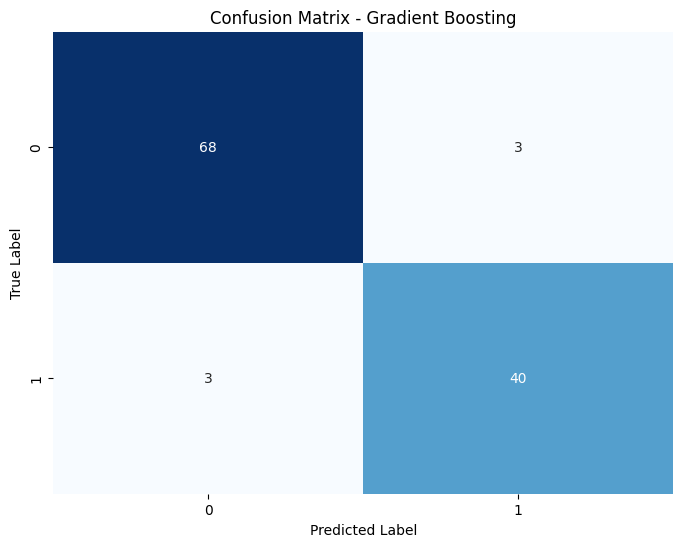

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Membuat confusion matrix untuk Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix untuk Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot confusion matrix untuk Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
